In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from sklearn.datasets import load_iris

In [7]:
iris = load_iris()

In [8]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [13]:
# independent
X = pd.DataFrame(iris['data'], columns=['sepal length in cm','sepal width','petal length','petal width'])

In [14]:
# dependent
y = iris['target']

In [15]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [31]:
# Apply decision tree classifier
from sklearn.tree import DecisionTreeClassifier
treeclassifier = DecisionTreeClassifier()

In [32]:
treeclassifier.fit(X_train, y_train)

DecisionTreeClassifier()

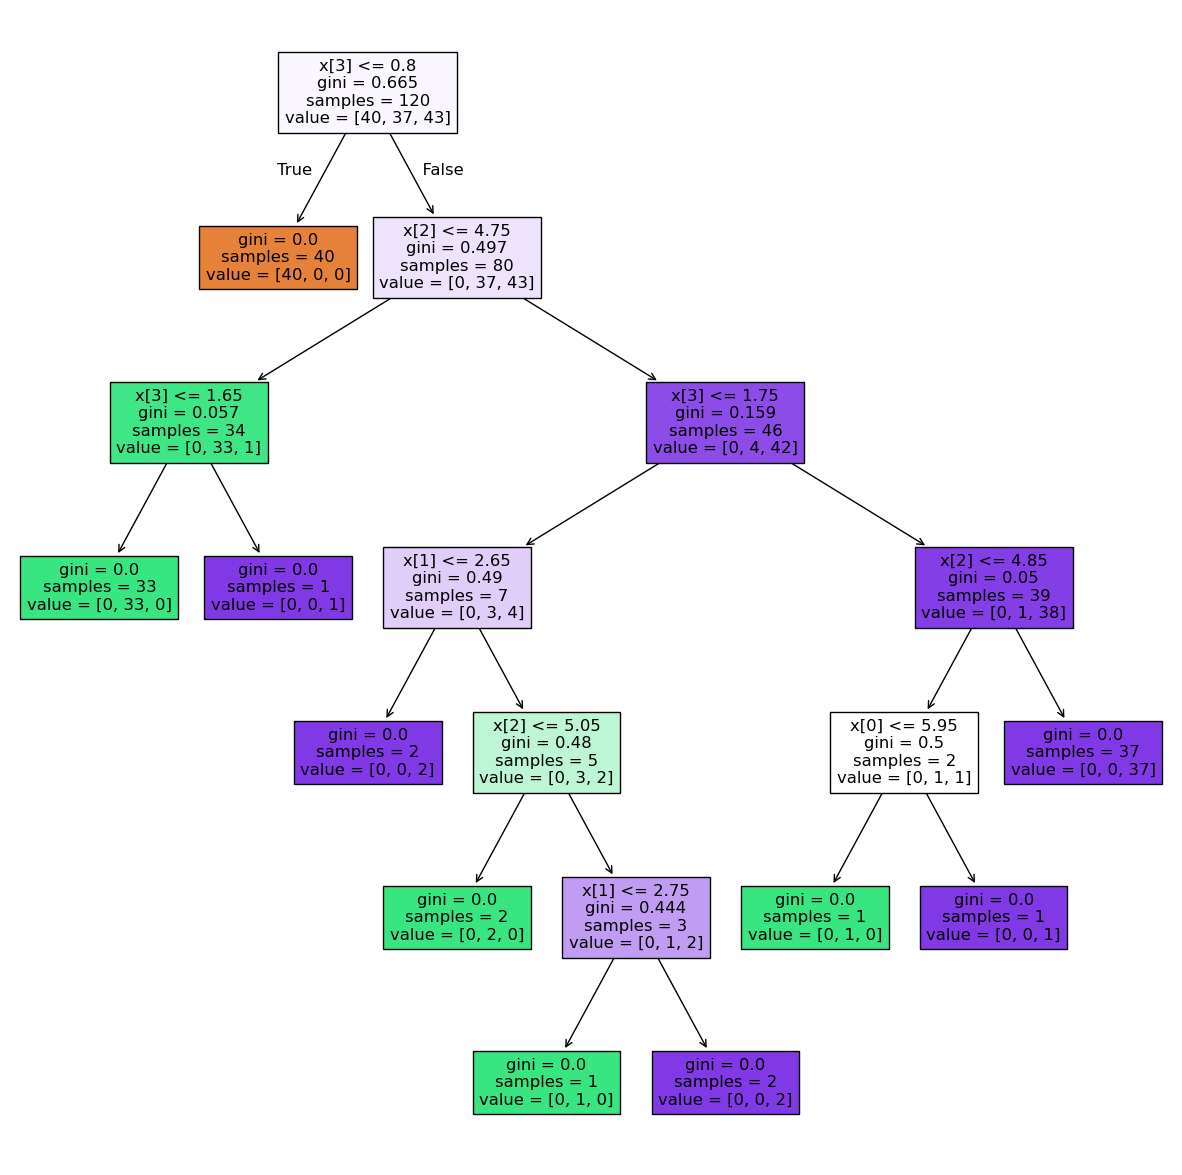

In [33]:
# Visualize the Decision Tree
from sklearn import tree
plt.figure(figsize=(15,15))
tree.plot_tree(treeclassifier, filled=True)
plt.show()

In [34]:
y_pred = treeclassifier.predict(X_test)

In [35]:
from sklearn.metrics import confusion_matrix, classification_report

In [36]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0 12  1]
 [ 0  0  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        13
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [30]:
# Post pruning is good for smaller dataset but pre pruning will be better to use.

# Decision Tree Classifier Prepruning and Hyperparameter Tuning

In [38]:
params = {
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
treemodel = DecisionTreeClassifier()

In [41]:
grid = GridSearchCV(treeclassifier, param_grid = params, cv=5, scoring='accuracy')

In [52]:
import warnings
warnings.filterwarnings('ignore')
print(grid.fit(X_train, y_train))

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')


In [53]:
grid.best_params_

{'criterion': 'log_loss',
 'max_depth': 4,
 'max_features': 'sqrt',
 'splitter': 'random'}

In [54]:
grid.best_score_

np.float64(0.95)

In [55]:
y_pred = grid.predict(X_test)

In [56]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0 12  1]
 [ 0  3  4]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.80      0.92      0.86        13
           2       0.80      0.57      0.67         7

    accuracy                           0.87        30
   macro avg       0.87      0.83      0.84        30
weighted avg       0.87      0.87      0.86        30



In [57]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8666666666666667
